# Import Dataset

In [1]:
import pandas as pd

df = pd.read_csv('dataset_tiktok_bersih.csv')

print("===== 5 Data Teratas =====")
print(df.head())

print("\n===== Info Dataset =====")
print(df.info())

print(f"\nJumlah data: {len(df)}")
print(f"Nama kolom: {list(df.columns)}")

===== 5 Data Teratas =====
                                            Komentar              Tanggal  \
0      𝑨𝑴𝑩𝑰𝑳4️⃣𝐃🟥 tempat hoki yang nggak ada duanya!  2025-10-05 07:17:13   
1  Kalo mafia main di 𝔸𝕄𝔹𝕀𝕃𝟒𝐃🔴 mungkin mereka bak...  2025-10-05 07:17:14   
2  Jangan ragu!!! Gacor parah disini 𝔸𝕄𝔹𝕀𝕃𝟒𝐃🔴 ter...  2025-10-05 07:17:15   
3  Emang bener kata mimin nya di bilang main di P...  2025-10-05 07:17:16   
4  P U L A U 7 7 7, gak nyangka banget bisa menan...  2025-10-05 07:17:17   

   Label  
0      1  
1      1  
2      1  
3      1  
4      1  

===== Info Dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Komentar  1189 non-null   object
 1   Tanggal   1189 non-null   object
 2   Label     1189 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 28.0+ KB
None

Jumlah data: 1189
Nama kolom: ['Komentar', 'Tanggal', 'Label']


In [2]:
if "Komentar_Asli" not in df.columns:
    df["Komentar_Asli"] = df["Komentar"]
    print("✅ Kolom 'Komentar_Asli' berhasil disimpan sebagai salinan teks mentah.")
else:
    print("ℹ️ Kolom 'Komentar_Asli' sudah ada, tidak dibuat ulang.")


✅ Kolom 'Komentar_Asli' berhasil disimpan sebagai salinan teks mentah.


# Pre-Processing

## Hapus Duplikat

In [3]:
# Mengecek jumlah data duplikat berdasarkan ketiga kolom: Komentar, Tanggal, dan Label
duplikat_count = df.duplicated(subset=['Komentar', 'Tanggal', 'Label']).sum()
print(f"Jumlah data duplikat (berdasarkan semua kolom): {duplikat_count}")

if duplikat_count > 0:
    print("\n===== Contoh Data Duplikat =====")
    print(df[df.duplicated(subset=['Komentar', 'Tanggal', 'Label'], keep=False)])
else:
    print("Tidak ada data duplikat yang ditemukan.")

df = df.drop_duplicates(subset=['Komentar', 'Tanggal', 'Label'], keep='first')

print(f"\nJumlah data setelah penghapusan duplikat: {len(df)}")


Jumlah data duplikat (berdasarkan semua kolom): 2

===== Contoh Data Duplikat =====
                                              Komentar              Tanggal  \
467  •$@AKUNWD44$¥\n💙ິ🌠GOODLUCK BOSKUU🌠💙ິ💞ື⃞ 💎ື⃟💙ືື...  2025-10-02 16:23:54   
468  @𝐑𝐏𝟑𝟔𝟗꧂🧿ິ🌀ິ💠ີ⃞ 🧿ື⃟🌀ືື💠 ື🧿ື⃟🌀ືື💠🧿ື⃟💠ືື🌀ື⃟🧿ື🧿 ື💠...  2025-08-10 07:06:47   
476  •$@AKUNWD44$¥\n💙ິ🌠GOODLUCK BOSKUU🌠💙ິ💞ື⃞ 💎ື⃟💙ືື...  2025-10-02 16:23:54   
479  @𝐑𝐏𝟑𝟔𝟗꧂🧿ິ🌀ິ💠ີ⃞ 🧿ື⃟🌀ືື💠 ື🧿ື⃟🌀ືື💠🧿ື⃟💠ືື🌀ື⃟🧿ື🧿 ື💠...  2025-08-10 07:06:47   

     Label                                      Komentar_Asli  
467      1  •$@AKUNWD44$¥\n💙ິ🌠GOODLUCK BOSKUU🌠💙ິ💞ື⃞ 💎ື⃟💙ືື...  
468      1  @𝐑𝐏𝟑𝟔𝟗꧂🧿ິ🌀ິ💠ີ⃞ 🧿ື⃟🌀ືື💠 ື🧿ື⃟🌀ືື💠🧿ື⃟💠ືື🌀ື⃟🧿ື🧿 ື💠...  
476      1  •$@AKUNWD44$¥\n💙ິ🌠GOODLUCK BOSKUU🌠💙ິ💞ື⃞ 💎ື⃟💙ືື...  
479      1  @𝐑𝐏𝟑𝟔𝟗꧂🧿ິ🌀ິ💠ີ⃞ 🧿ື⃟🌀ືື💠 ື🧿ື⃟🌀ືື💠🧿ື⃟💠ືື🌀ື⃟🧿ື🧿 ື💠...  

Jumlah data setelah penghapusan duplikat: 1187


## Normalisasi Karakter Unicode

In [4]:
!pip install ftfy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.0 MB/s eta 0:00:00


In [5]:
!pip install Unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 7.8 MB/s eta 0:00:00


In [6]:
import ftfy
import pandas as pd
import unicodedata
from unidecode import unidecode  # pip install Unidecode

emoji_digit_map = {
    "0️⃣": "0", "1️⃣": "1", "2️⃣": "2", "3️⃣": "3", "4️⃣": "4",
    "5️⃣": "5", "6️⃣": "6", "7️⃣": "7", "8️⃣": "8", "9️⃣": "9"
}

def normalize_zalgo_keep_emoji(text):
    text = str(text)

    # Perbaiki karakter rusak / Zalgo (ftfy)
    text = ftfy.fix_text(text)

    # Normalisasi Unicode (NFKC)
    text = unicodedata.normalize('NFKC', text)

    # Simpan emoji sementara supaya tidak terhapus saat unidecode
    emojis = {}
    for i, c in enumerate(text):
        if c in emoji_digit_map or unicodedata.category(c).startswith("So"):
            emojis[f"EMOJI{i}"] = c
            text = text.replace(c, f"EMOJI{i}")

    # Ubah huruf Zalgo/tebal/miring ke ASCII biasa
    text = unidecode(text)

    # Kembalikan emoji
    for placeholder, emoji_char in emojis.items():
        text = text.replace(placeholder, emoji_char)

    for emoji, digit in emoji_digit_map.items():
        text = text.replace(emoji, digit)

    return text

sample_before = df.copy()

df["Komentar"] = df["Komentar"].astype(str).apply(normalize_zalgo_keep_emoji)

sample_after = df.loc[sample_before.index[:5], ["Komentar"]]
comparison_top5 = pd.DataFrame({
    "Sebelum Normalisasi": sample_before.loc[sample_before.index[:5], "Komentar"].values,
    "Sesudah Normalisasi": sample_after["Komentar"].values
})
print("Hasil Normalisasi Unicode + Zalgo:")
display(comparison_top5.style.set_properties(**{"text-align": "left"}))


Hasil Normalisasi Unicode + Zalgo:


,Sebelum Normalisasi,Sesudah Normalisasi
0,𝑨𝑴𝑩𝑰𝑳4️⃣𝐃🟥 tempat hoki yang nggak ada duanya!,AMBIL4D🟥 tempat hoki yang nggak ada duanya!
1,Kalo mafia main di 𝔸𝕄𝔹𝕀𝕃𝟒𝐃🔴 mungkin mereka bakal lebih sering Shopping daripada bikin rencana! 😂,Kalo mafia main di AMBIL4D🔴 mungkin mereka bakal lebih sering Shopping daripada bikin rencana! 😂
2,Jangan ragu!!! Gacor parah disini 𝔸𝕄𝔹𝕀𝕃𝟒𝐃🔴 terbaik 2025!!! 😊😊💸,Jangan ragu!!! Gacor parah disini AMBIL4D🔴 terbaik 2025!!! 😊😊💸
3,Emang bener kata mimin nya di bilang main di PG aja atau Pragmatic pertama gas langsung Naik !!! Terima kasih RANTAITOTO,Emang bener kata mimin nya di bilang main di PG aja atau Pragmatic pertama gas langsung Naik !!! Terima kasih RANTAITOTO
4,"P U L A U 7 7 7, gak nyangka banget bisa menang! Makasih banyak atas semuanya!","P U L A U 7 7 7, gak nyangka banget bisa menang! Makasih banyak atas semuanya!"


## Case Folding

In [7]:
import pandas as pd

sample_before = df.copy()

df["Komentar"] = df["Komentar"].astype(str).str.lower()

sample_after = df.loc[sample_before.index[:5], ["Komentar"]]
comparison_casefold = pd.DataFrame({
    "Sebelum Case Folding": sample_before.loc[sample_before.index[:5], "Komentar"].values,
    "Setelah Case Folding": sample_after["Komentar"].values
})
print("Hasil Case Folding (5 komentar teratas):")
display(comparison_casefold.style.set_properties(**{"text-align": "left"}))


Hasil Case Folding (5 komentar teratas):


,Sebelum Case Folding,Setelah Case Folding
0,AMBIL4D🟥 tempat hoki yang nggak ada duanya!,ambil4d🟥 tempat hoki yang nggak ada duanya!
1,Kalo mafia main di AMBIL4D🔴 mungkin mereka bakal lebih sering Shopping daripada bikin rencana! 😂,kalo mafia main di ambil4d🔴 mungkin mereka bakal lebih sering shopping daripada bikin rencana! 😂
2,Jangan ragu!!! Gacor parah disini AMBIL4D🔴 terbaik 2025!!! 😊😊💸,jangan ragu!!! gacor parah disini ambil4d🔴 terbaik 2025!!! 😊😊💸
3,Emang bener kata mimin nya di bilang main di PG aja atau Pragmatic pertama gas langsung Naik !!! Terima kasih RANTAITOTO,emang bener kata mimin nya di bilang main di pg aja atau pragmatic pertama gas langsung naik !!! terima kasih rantaitoto
4,"P U L A U 7 7 7, gak nyangka banget bisa menang! Makasih banyak atas semuanya!","p u l a u 7 7 7, gak nyangka banget bisa menang! makasih banyak atas semuanya!"


In [8]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 13.9 MB/s eta 0:00:00


In [9]:
!pip install tqdm

## Data Cleaning

In [10]:
import re
import pandas as pd
from tqdm import tqdm

tqdm.pandas()

def clean_text_final(text):
    text = str(text)

    # Hapus simbol @ dan #, tapi ganti _ menjadi spasi
    text = re.sub(r'[@#]', '', text)
    text = text.replace('_', ' ')

    # Hapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Hapus karakter Unicode, emoji, teks zalgo, simbol aneh
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Hapus simbol/tanda baca yang tidak relevan
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

    # Gabungkan huruf yang dipisah spasi
    def merge_spaced_letters(t):
        def replacer(m):
            word = m.group(0).replace(' ', '')
            return word if len(word) <= 15 else m.group(0)
        return re.sub(r'\b(?:[a-zA-Z]\s){2,}[a-zA-Z]\b', replacer, t)
    text = merge_spaced_letters(text)

    # Hapus angka yang berdiri sendiri
    text = re.sub(r'\b\d+\b', '', text)

    # Hapus huruf tunggal yang diulang lebih dari 1 kali (misal "ii", "aaa", "bbbb")
    text = re.sub(r'\b([a-zA-Z])\1+\b', '', text)

    # Ubah huruf berulang menjadi satu (misal "mantaaap" → "mantap")
    text = re.sub(r'([a-zA-Z])\1+', r'\1', text)

    # Rapikan spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()

    return text


sample_before = df.copy()

print("🔄 Sedang membersihkan data komentar...")
df["Komentar"] = df["Komentar"].progress_apply(clean_text_final)

changed_mask = sample_before["Komentar"] != df["Komentar"]
changed = df[changed_mask].copy()

# Hapus baris yang komentar-nya terlalu pendek (kurang dari 4 karakter)
before_rows = len(df)
df = df[df["Komentar"].str.len() >= 4].copy()
after_rows = len(df)

print(f"\nMenghapus {before_rows - after_rows} baris yang komentarnya < 4 karakter.")

df.reset_index(drop=True, inplace=True)

comparison_clean = pd.DataFrame({
    "Sebelum Cleaning": sample_before.loc[changed.index, "Komentar"].values,
    "Sesudah Cleaning": changed["Komentar"].values
})

print("\nHasil Data Cleaning (5 komentar yang berubah):")
display(comparison_clean.head(5).style.set_properties(**{"text-align": "left"}))



🔄 Sedang membersihkan data komentar...


100%|██████████| 1187/1187 [00:00<00:00, 5351.39it/s]


Menghapus 71 baris yang komentarnya < 4 karakter.

Hasil Data Cleaning (5 komentar yang berubah):


,Sebelum Cleaning,Sesudah Cleaning
0,ambil4d🟥 tempat hoki yang nggak ada duanya!,ambil4d tempat hoki yang ngak ada duanya
1,kalo mafia main di ambil4d🔴 mungkin mereka bakal lebih sering shopping daripada bikin rencana! 😂,kalo mafia main di ambil4d mungkin mereka bakal lebih sering shoping daripada bikin rencana
2,jangan ragu!!! gacor parah disini ambil4d🔴 terbaik 2025!!! 😊😊💸,jangan ragu gacor parah disini ambil4d terbaik
3,emang bener kata mimin nya di bilang main di pg aja atau pragmatic pertama gas langsung naik !!! terima kasih rantaitoto,emang bener kata mimin nya di bilang main di pg aja atau pragmatic pertama gas langsung naik terima kasih rantaitoto
4,"p u l a u 7 7 7, gak nyangka banget bisa menang! makasih banyak atas semuanya!",pulau gak nyangka banget bisa menang makasih banyak atas semuanya


In [11]:
import nltk

nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## Tokenisasi

In [12]:
import pandas as pd
from nltk.tokenize import word_tokenize

sample_before_token = df.copy()

def tokenize_text(text):
    """
    Fungsi untuk melakukan tokenisasi kata menggunakan nltk.
    Mengubah teks menjadi list token kata.
    """
    text = str(text)
    tokens = word_tokenize(text)
    return tokens

# Terapkan tokenisasi pada kolom 'Komentar'
df["Tokens"] = df["Komentar"].apply(tokenize_text)

print("Hasil Tokenisasi:")
display(df[["Komentar", "Tokens"]].head(5).style.set_properties(**{"text-align": "left"}))


Hasil Tokenisasi:


,Komentar,Tokens
0,ambil4d tempat hoki yang ngak ada duanya,"['ambil4d', 'tempat', 'hoki', 'yang', 'ngak', 'ada', 'duanya']"
1,kalo mafia main di ambil4d mungkin mereka bakal lebih sering shoping daripada bikin rencana,"['kalo', 'mafia', 'main', 'di', 'ambil4d', 'mungkin', 'mereka', 'bakal', 'lebih', 'sering', 'shoping', 'daripada', 'bikin', 'rencana']"
2,jangan ragu gacor parah disini ambil4d terbaik,"['jangan', 'ragu', 'gacor', 'parah', 'disini', 'ambil4d', 'terbaik']"
3,emang bener kata mimin nya di bilang main di pg aja atau pragmatic pertama gas langsung naik terima kasih rantaitoto,"['emang', 'bener', 'kata', 'mimin', 'nya', 'di', 'bilang', 'main', 'di', 'pg', 'aja', 'atau', 'pragmatic', 'pertama', 'gas', 'langsung', 'naik', 'terima', 'kasih', 'rantaitoto']"
4,pulau gak nyangka banget bisa menang makasih banyak atas semuanya,"['pulau', 'gak', 'nyangka', 'banget', 'bisa', 'menang', 'makasih', 'banyak', 'atas', 'semuanya']"


## Normalisasi Teks

In [13]:
import pandas as pd

normalization_dict = {
    "hapy": "happy",
    "yg": "yang",
    "jepe": "jackpot",
    "jp": "jackpot",
    "gk": "tidak",
    "ga": "tidak",
    "ngga": "tidak",
    "tdk": "tidak",
    "gw": "saya",
    "gua": "saya",
    "lo": "kamu",
    "lu": "kamu",
    "sc": "scatter",
    "wd": "withdraw",
    "macem": "macam",
    "best": "terbaik",
    "ngak": "tidak",
    "bg": "bang",
}

def normalize_tokens_manual(token_list):
    """
    Fungsi untuk menormalkan token berdasarkan kamus mapping manual.
    Jika token tidak ada di kamus, dikembalikan apa adanya.
    """
    return [normalization_dict.get(token.lower(), token) for token in token_list]

sample_before_normalization = df.copy()

# Terapkan normalisasi token pada kolom 'Tokens'
print("Sedang menormalkan token komentar...")
df["Tokens_Normalized"] = df["Tokens"].apply(normalize_tokens_manual)

changed_normalization = df[df["Tokens"] != df["Tokens_Normalized"]].copy()

comparison_normalization = pd.DataFrame({
    "Tokens Sebelum": sample_before_normalization.loc[changed_normalization.index, "Tokens"].values,
    "Tokens Sesudah": changed_normalization["Tokens_Normalized"].values
})

print("\nHasil Normalisasi Token (5 komentar yang berubah):")
display(comparison_normalization.head(5).style.set_properties(**{"text-align": "left"}))


Sedang menormalkan token komentar...

Hasil Normalisasi Token (5 komentar yang berubah):


,Tokens Sebelum,Tokens Sesudah
0,"['ambil4d', 'tempat', 'hoki', 'yang', 'ngak', 'ada', 'duanya']","['ambil4d', 'tempat', 'hoki', 'yang', 'tidak', 'ada', 'duanya']"
1,"['pulau', 'lo', 'emang', 'terbaik', 'bisa', 'menang', 'gini', 'rasanya', 'luar', 'biasa', 'terima', 'kasih', 'banyak']","['pulau', 'kamu', 'emang', 'terbaik', 'bisa', 'menang', 'gini', 'rasanya', 'luar', 'biasa', 'terima', 'kasih', 'banyak']"
2,"['mantap', 'terus', 'bandar388', 'selalu', 'bikin', 'hapy']","['mantap', 'terus', 'bandar388', 'selalu', 'bikin', 'happy']"
3,"['baik', 'banget', 'adminya', 'ramah', 'dan', 'kasih', 'jp', 'semoga', 'visi4d', 'jaya', 'selalu']","['baik', 'banget', 'adminya', 'ramah', 'dan', 'kasih', 'jackpot', 'semoga', 'visi4d', 'jaya', 'selalu']"
4,"['gw', 'yang', 'habis', 'wd', 'juta', 'bilek']","['saya', 'yang', 'habis', 'withdraw', 'juta', 'bilek']"


## Stopword Removal

In [14]:
!pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.6 MB/s eta 0:00:00


In [15]:
import pandas as pd
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.get_stop_words()

custom_stopwords = [
    # Kata sapaan/media sosial
    "bang", "bro", "sis", "wkwk", "haha", "yah", "loh", "dong", "deh", "nih", "tuh", "eh", "lah", "ya",
    # Konjungsi (kata penghubung)
    "dan", "atau", "tapi", "bahwa", "serta",
    # Preposisi (kata depan)
    "di", "ke", "dari", "pada", "dengan", "untuk", "dalam", "terhadap", "bagi", "kepada",
    # Pronomina (kata ganti)
    "saya", "aku", "kamu", "dia", "mereka", "kita", "kami", "nya", "mu", "ku",
    # Artikel (kata sandang)
    "sang", "si",
    # Adverbia (kata keterangan)
    "sangat", "pun", "akan", "telah", "lagi", "masih", "saja", "sudah", "aja",
    # Kata bantu / penegas
    "adalah", "ialah", "merupakan", "sebagai", "yaitu", "yakni", "ini", "itu",
]

all_stopwords = set(stopword + custom_stopwords)

def remove_stopwords(token_list):
    """
    Fungsi untuk menghapus stopword dari daftar token.
    Token yang ada di daftar stopword (Sastrawi + custom) akan dihilangkan.
    """
    return [token for token in token_list if token.lower() not in all_stopwords]

sample_before_stopword = df.copy()

# Terapkan stopword removal pada kolom 'Tokens_Normalized'
print("Sedang menghapus stopword dari token komentar (termasuk tambahan manual)...")
df["Tokens_Clean"] = df["Tokens_Normalized"].apply(remove_stopwords)

changed_stopword = df[df["Tokens_Normalized"] != df["Tokens_Clean"]].copy()

comparison_stopword = pd.DataFrame({
    "Tokens Sebelum": sample_before_stopword.loc[changed_stopword.index, "Tokens_Normalized"].values,
    "Tokens Sesudah": changed_stopword["Tokens_Clean"].values
})

print("\nHasil Penghapusan Stopword (5 komentar yang berubah):")
display(comparison_stopword.head(5).style.set_properties(**{"text-align": "left"}))


Sedang menghapus stopword dari token komentar (termasuk tambahan manual)...

Hasil Penghapusan Stopword (5 komentar yang berubah):


,Tokens Sebelum,Tokens Sesudah
0,"['ambil4d', 'tempat', 'hoki', 'yang', 'tidak', 'ada', 'duanya']","['ambil4d', 'tempat', 'hoki', 'duanya']"
1,"['kalo', 'mafia', 'main', 'di', 'ambil4d', 'mungkin', 'mereka', 'bakal', 'lebih', 'sering', 'shoping', 'daripada', 'bikin', 'rencana']","['kalo', 'mafia', 'main', 'ambil4d', 'mungkin', 'bakal', 'lebih', 'sering', 'shoping', 'bikin', 'rencana']"
2,"['emang', 'bener', 'kata', 'mimin', 'nya', 'di', 'bilang', 'main', 'di', 'pg', 'aja', 'atau', 'pragmatic', 'pertama', 'gas', 'langsung', 'naik', 'terima', 'kasih', 'rantaitoto']","['emang', 'bener', 'kata', 'mimin', 'bilang', 'main', 'pg', 'pragmatic', 'pertama', 'gas', 'langsung', 'naik', 'terima', 'kasih', 'rantaitoto']"
3,"['pulau', 'gak', 'nyangka', 'banget', 'bisa', 'menang', 'makasih', 'banyak', 'atas', 'semuanya']","['pulau', 'gak', 'nyangka', 'banget', 'menang', 'makasih', 'banyak', 'atas', 'semuanya']"
4,"['pulau', 'pokoknya', 'makasih', 'banyak', 'deh', 'gak', 'pernah', 'kecewa', 'main', 'di', 'sini']","['pulau', 'pokoknya', 'makasih', 'banyak', 'gak', 'pernah', 'kecewa', 'main', 'sini']"


## Terjemahan

In [16]:
from tqdm import tqdm
import re

tqdm.pandas()

manual_dict = {
    "good": "bagus",
    "bless": "memberkati",
    "god": "tuhan",
    "bad": "buruk",
    "great": "hebat",
    "happy": "senang",
    "sad": "sedih",
    "sorry": "maaf",
    "thanks": "terima kasih",
    "thank": "terima kasih",
    "you": "kamu",
    "me": "saya",
    "my": "saya",
    "join": "bergabung",
    "now": "sekarang",
    "win": "menang",
    "winner": "pemenang",
    "withdraw": "menarik",
    "bonus": "bonus",
    "money": "uang",
    "cash": "uang tunai",
    "prize": "hadiah",
    "game": "permainan",
    "play": "main",
    "online": "daring",
    "bet": "taruhan",
    "betting": "pertaruhan",
    "gamble": "judi",
    "gambling": "perjudian",
    "luck": "keberuntungan",
    "lucky": "beruntung",
    "winrate": "tingkat kemenangan",
    "free": "gratis",
    "event": "acara",
    "follow": "ikuti",
    "click": "klik",
    "login": "masuk",
    "register": "daftar",
    "account": "akun",
    "promotion": "promosi",
    "deposit": "setoran",
    "withdrawal": "penarikan",
    "official": "resmi",
    "website": "situs",
    "trust": "percaya",
    "safe": "aman",
    "secure": "terlindungi",
    "enjoy": "nikmati",
    "best": "terbaik",
    "congratulations": "selamat",
    "easy": "mudah",
    "fast": "cepat",
    "slow": "lambat",
    "support": "dukungan",
    "help": "bantuan",
    "please": "tolong",
    "today": "hari ini",
    "tomorrow": "besok",
    "yesterday": "kemarin",
    "again": "lagi",
    "come": "datang",
    "back": "kembali",
    "big": "besar",
    "small": "kecil"
}

def translate_with_manual_dict(text):
    """
    Terjemahkan hanya kata yang ada di kamus manual.
    Tidak mengubah struktur kalimat asli.
    """
    try:
        words = text.split()
        translated_words = []
        for w in words:
            clean_w = re.sub(r'[^\w\s]', '', w.lower())
            if clean_w in manual_dict:
                translated = manual_dict[clean_w]
                translated_words.append(re.sub(clean_w, translated, w, flags=re.IGNORECASE))
            else:
                translated_words.append(w)
        return " ".join(translated_words)
    except:
        return text

df["Clean_Text"] = df["Tokens_Clean"].apply(lambda x: " ".join(x))

print("Menerjemahkan kata Inggris menggunakan kamus manual (tanpa langdetect)...")
df["Translated_Text"] = df["Clean_Text"].progress_apply(translate_with_manual_dict)

comparison_translate = df[df["Clean_Text"] != df["Translated_Text"]].copy()
print(f"\nJumlah komentar yang diterjemahkan sebagian: {len(comparison_translate)}")
print("\nContoh hasil terjemahan (5 data):")
display(comparison_translate[["Clean_Text", "Translated_Text"]].head().style.set_properties(**{"text-align": "left"}))


Menerjemahkan kata Inggris menggunakan kamus manual (tanpa langdetect)...


100%|██████████| 1116/1116 [00:00<00:00, 39573.25it/s]


Jumlah komentar yang diterjemahkan sebagian: 175

Contoh hasil terjemahan (5 data):


,Clean_Text,Translated_Text
12,mantap terus bandar388 selalu bikin happy,mantap terus bandar388 selalu bikin senang
19,habis withdraw juta bilek,habis menarik juta bilek
25,cuman mau kasih saran bermain loncengtoto mudah withdraw gede,cuman mau kasih saran bermain loncengtoto mudah menarik gede
46,dapet jackpot besar beberapa putaran game slot visi4d juara,dapet jackpot besar beberapa putaran permainan slot visi4d juara
47,main bentar withdraw cepat emang gak salah pilih tempat jurnal4dgacor,main bentar menarik cepat emang gak salah pilih tempat jurnal4dgacor


## Stemming

In [17]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def tokenize_text(text):
    """
    Tokenisasi sederhana: pecah kalimat jadi kata berdasarkan spasi & karakter alfabet.
    """
    return re.findall(r'\b\w+\b', str(text).lower())

def stem_tokens_from_text(text):
    """
    Fungsi untuk stemming langsung dari teks hasil terjemahan.
    - Tokenisasi dulu
    - Lakukan stemming per kata
    - Kembalikan list token hasil stemming
    """
    tokens = tokenize_text(text)
    return [stemmer.stem(token) for token in tokens]

sample_before_stemming = df.copy()

# Terapkan stemming pada kolom hasil terjemahan
print("Sedang melakukan stemming pada hasil terjemahan teks...")
df["Tokens_Stemmed"] = df["Translated_Text"].apply(stem_tokens_from_text)

changed_stemming = df[df["Translated_Text"] != df["Tokens_Stemmed"].apply(lambda x: " ".join(x))].copy()

comparison_stemming = pd.DataFrame({
    "Teks Sebelum": sample_before_stemming.loc[changed_stemming.index, "Translated_Text"].values,
    "Tokens Sesudah Stemming": changed_stemming["Tokens_Stemmed"].values
})

print("\nHasil Stemming Token (5 komentar yang berubah):")
display(comparison_stemming.head(5).style.set_properties(**{"text-align": "left"}))


Sedang melakukan stemming pada hasil terjemahan teks...

Hasil Stemming Token (5 komentar yang berubah):


,Teks Sebelum,Tokens Sesudah Stemming
0,ambil4d tempat hoki duanya,"['ambil4d', 'tempat', 'hoki', 'dua']"
1,jangan ragu gacor parah disini ambil4d terbaik,"['jangan', 'ragu', 'gacor', 'parah', 'sini', 'ambil4d', 'baik']"
2,pulau gak nyangka banget menang makasih banyak atas semuanya,"['pulau', 'gak', 'nyangka', 'banget', 'menang', 'makasih', 'banyak', 'atas', 'semua']"
3,pulau pokoknya makasih banyak gak pernah kecewa main sini,"['pulau', 'pokok', 'makasih', 'banyak', 'gak', 'pernah', 'kecewa', 'main', 'sini']"
4,pulau emang terbaik menang gini rasanya luar biasa terima kasih banyak,"['pulau', 'emang', 'baik', 'menang', 'gin', 'rasa', 'luar', 'biasa', 'terima', 'kasih', 'banyak']"


In [18]:
print("Informasi DataFrame Saat Ini\n" + "="*40)
print(f"Jumlah baris: {len(df)}")
print(f"Jumlah kolom: {len(df.columns)}\n")

print("Daftar kolom dalam DataFrame:")
for i, col in enumerate(df.columns, start=1):
    print(f"{i}. {col}")

print("\nContoh isi DataFrame (3 baris teratas):")
display(df.head(3).style.set_properties(**{"text-align": "left"}))


Informasi DataFrame Saat Ini
Jumlah baris: 1116
Jumlah kolom: 10

Daftar kolom dalam DataFrame:
1. Komentar
2. Tanggal
3. Label
4. Komentar_Asli
5. Tokens
6. Tokens_Normalized
7. Tokens_Clean
8. Clean_Text
9. Translated_Text
10. Tokens_Stemmed

Contoh isi DataFrame (3 baris teratas):


,Komentar,Tanggal,Label,Komentar_Asli,Tokens,Tokens_Normalized,Tokens_Clean,Clean_Text,Translated_Text,Tokens_Stemmed
0,ambil4d tempat hoki yang ngak ada duanya,2025-10-05 07:17:13,1,𝑨𝑴𝑩𝑰𝑳4️⃣𝐃🟥 tempat hoki yang nggak ada duanya!,"['ambil4d', 'tempat', 'hoki', 'yang', 'ngak', 'ada', 'duanya']","['ambil4d', 'tempat', 'hoki', 'yang', 'tidak', 'ada', 'duanya']","['ambil4d', 'tempat', 'hoki', 'duanya']",ambil4d tempat hoki duanya,ambil4d tempat hoki duanya,"['ambil4d', 'tempat', 'hoki', 'dua']"
1,kalo mafia main di ambil4d mungkin mereka bakal lebih sering shoping daripada bikin rencana,2025-10-05 07:17:14,1,Kalo mafia main di 𝔸𝕄𝔹𝕀𝕃𝟒𝐃🔴 mungkin mereka bakal lebih sering Shopping daripada bikin rencana! 😂,"['kalo', 'mafia', 'main', 'di', 'ambil4d', 'mungkin', 'mereka', 'bakal', 'lebih', 'sering', 'shoping', 'daripada', 'bikin', 'rencana']","['kalo', 'mafia', 'main', 'di', 'ambil4d', 'mungkin', 'mereka', 'bakal', 'lebih', 'sering', 'shoping', 'daripada', 'bikin', 'rencana']","['kalo', 'mafia', 'main', 'ambil4d', 'mungkin', 'bakal', 'lebih', 'sering', 'shoping', 'bikin', 'rencana']",kalo mafia main ambil4d mungkin bakal lebih sering shoping bikin rencana,kalo mafia main ambil4d mungkin bakal lebih sering shoping bikin rencana,"['kalo', 'mafia', 'main', 'ambil4d', 'mungkin', 'bakal', 'lebih', 'sering', 'shoping', 'bikin', 'rencana']"
2,jangan ragu gacor parah disini ambil4d terbaik,2025-10-05 07:17:15,1,Jangan ragu!!! Gacor parah disini 𝔸𝕄𝔹𝕀𝕃𝟒𝐃🔴 terbaik 2025!!! 😊😊💸,"['jangan', 'ragu', 'gacor', 'parah', 'disini', 'ambil4d', 'terbaik']","['jangan', 'ragu', 'gacor', 'parah', 'disini', 'ambil4d', 'terbaik']","['jangan', 'ragu', 'gacor', 'parah', 'disini', 'ambil4d', 'terbaik']",jangan ragu gacor parah disini ambil4d terbaik,jangan ragu gacor parah disini ambil4d terbaik,"['jangan', 'ragu', 'gacor', 'parah', 'sini', 'ambil4d', 'baik']"


In [19]:
# Tentukan urutan kolom baru
cols = df.columns.tolist()

if "Komentar_Asli" in cols:
    cols.insert(0, cols.pop(cols.index("Komentar_Asli")))

df_reordered = df[cols]

# Simpan ke file Excel
output_path = "hasil_cleaning_final.xlsx"
df_reordered.to_excel(output_path, index=False)

print(f"DataFrame berhasil disimpan ke file: {output_path}")
print("Kolom 'Komentar_Asli' telah dipindahkan ke posisi paling kiri.")


DataFrame berhasil disimpan ke file: hasil_cleaning_final.xlsx
Kolom 'Komentar_Asli' telah dipindahkan ke posisi paling kiri.


## Gabung

In [20]:
import pandas as pd

def detokenize_tokens(token_list):
    """
    Fungsi untuk menggabungkan token kembali menjadi string teks utuh.
    Token akan dipisahkan oleh spasi.
    """
    return ' '.join(token_list)

# Terapkan penggabungan token pada kolom 'Tokens_Stemmed'
df["Komentar_Processed"] = df["Tokens_Stemmed"].apply(detokenize_tokens)

print("Hasil Detokenisasi Token Hasil Stemming:")
display(df[["Tokens_Stemmed", "Komentar_Processed"]].head(5).style.set_properties(**{"text-align": "left"}))


Hasil Detokenisasi Token Hasil Stemming:


,Tokens_Stemmed,Komentar_Processed
0,"['ambil4d', 'tempat', 'hoki', 'dua']",ambil4d tempat hoki dua
1,"['kalo', 'mafia', 'main', 'ambil4d', 'mungkin', 'bakal', 'lebih', 'sering', 'shoping', 'bikin', 'rencana']",kalo mafia main ambil4d mungkin bakal lebih sering shoping bikin rencana
2,"['jangan', 'ragu', 'gacor', 'parah', 'sini', 'ambil4d', 'baik']",jangan ragu gacor parah sini ambil4d baik
3,"['emang', 'bener', 'kata', 'mimin', 'bilang', 'main', 'pg', 'pragmatic', 'pertama', 'gas', 'langsung', 'naik', 'terima', 'kasih', 'rantaitoto']",emang bener kata mimin bilang main pg pragmatic pertama gas langsung naik terima kasih rantaitoto
4,"['pulau', 'gak', 'nyangka', 'banget', 'menang', 'makasih', 'banyak', 'atas', 'semua']",pulau gak nyangka banget menang makasih banyak atas semua


In [21]:
# Hapus Baris dengan Token atau Teks Kosong

before = len(df)

df = df[
    (df["Tokens_Stemmed"].apply(lambda x: isinstance(x, list) and len(x) > 0)) &
    (df["Komentar_Processed"].str.strip() != "")
]

after = len(df)

print(f"{before - after} baris kosong telah dihapus. Sisa data: {after} baris.")


2 baris kosong telah dihapus. Sisa data: 1114 baris.


# Split Data

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

# X = fitur, y = target
X = df["Komentar_Processed"]
y = df["Label"]

# Split data menjadi train (80%) dan test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Ukuran dataset:")
print(f"  Train: {len(X_train)} baris")
print(f"  Test : {len(X_test)} baris")


Ukuran dataset:
  Train: 891 baris
  Test : 223 baris


# TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

texts = df['Komentar_Processed'].tolist()

vectorizer_all = TfidfVectorizer(
    analyzer='word',
    ngram_range=(1,3),
    lowercase=True,
    stop_words=None
)

vectorizer_all.fit(texts)

print("Jumlah fitur asli (sebelum max_features):", len(vectorizer_all.get_feature_names_out()))

Jumlah fitur asli (sebelum max_features): 11867


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion

# Word-level TF-IDF (unigram sampai trigram)
word_tfidf = TfidfVectorizer(
    analyzer='word',
    ngram_range=(1, 3),     # unigram, bigram, trigram
    max_features=6000,      # jumlah fitur maksimum
    lowercase=True
)

# Character-level TF-IDF (1–3 karakter)
char_tfidf = TfidfVectorizer(
    analyzer='char',
    ngram_range=(1, 3),     # 1–3 karakter
    max_features=3000,      # jumlah fitur maksimum untuk karakter
    lowercase=True
)

# Gabungkan dengan bobot 60% (word) dan 40% (char)
combined_tfidf = FeatureUnion(
    transformer_list=[
        ("word_tfidf", word_tfidf),
        ("char_tfidf", char_tfidf)
    ],
    transformer_weights={
        "word_tfidf": 0.6,
        "char_tfidf": 0.4
    }
)

# Fit hanya pada data train untuk mencegah data leakage
combined_tfidf.fit(X_train)

# Transform data train dan test
X_train_tfidf = combined_tfidf.transform(X_train)
X_test_tfidf = combined_tfidf.transform(X_test)

print("✅ Vectorisasi TF-IDF (word + char, bobot 70/30) selesai")
print("Dimensi X_train:", X_train_tfidf.shape)
print("Dimensi X_test :", X_test_tfidf.shape)


✅ Vectorisasi TF-IDF (word + char, bobot 70/30) selesai
Dimensi X_train: (891, 9000)
Dimensi X_test : (223, 9000)


## Output TF-IDF Word-Level

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import random

# Transform TF-IDF Word-level
X_train_word = word_tfidf.transform(X_train)
word_features = word_tfidf.get_feature_names_out()

# Ambil 10 dokumen secara acak (berdasarkan posisi, bukan index label)
num_docs = 10
random_indices = random.sample(range(X_train.shape[0]), min(num_docs, X_train.shape[0]))

# X_train diakses dengan .iloc (Series/DataFrame)
try:
    X_sample = X_train.iloc[random_indices].tolist()
except AttributeError:
    X_sample = [X_train[i] for i in random_indices]

# Ambil representasi TF-IDF dari dokumen yang sama
X_sample_word = X_train_word[random_indices].toarray()

# Buat DataFrame
df_word = pd.DataFrame(X_sample_word, columns=word_features)

# Ambil hanya kolom dengan nilai TF-IDF > 0
df_filtered = df_word.loc[:, (df_word != 0).any(axis=0)]

# Tambahkan teks asli di kolom paling kiri
df_final = pd.concat([pd.DataFrame({"Teks Asli": X_sample}), df_filtered], axis=1)

df_final = df_final.round(4)

# Simpan ke Excel (format tabel rapi)
output_file = "tfidf_word_random.xlsx"
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df_final.to_excel(writer, index=False, sheet_name='TF-IDF Word Random')
    worksheet = writer.sheets['TF-IDF Word Random']
    # Atur lebar kolom agar rapi di Excel
    worksheet.column_dimensions['A'].width = 60  # kolom teks asli
    for col in worksheet.iter_cols(min_col=2, max_col=len(df_final.columns)):
        worksheet.column_dimensions[col[0].column_letter].width = 15

print("TF-IDF Word-level (acak) selesai & disimpan sebagai", output_file)
print("\nContoh hasil 10 dokumen acak:")
print(df_final.head(10))


✅ TF-IDF Word-level (acak) selesai & disimpan sebagai tfidf_word_random.xlsx

📊 Contoh hasil 10 dokumen acak:
                                           Teks Asli    arti   bagus  \
0  gabut kantor buka tabung4d sebentar malah dape...  0.0000  0.0000   
1                              bagus bener main sini  0.0000  0.2607   
2                                pengn buat vlog tpi  0.0000  0.0000   
3    pikir gak punya duit biar gak panik gimana dokt  0.0000  0.0000   
4                                               apcd  0.0000  0.0000   
5                                scnya gampang masuk  0.0000  0.0000   
6                                          judolbabi  0.0000  0.0000   
7                                      kasih linknya  0.0000  0.0000   
8    sana in corpore sano arti tubuh sehat jiwa kuat  0.2215  0.0000   
9                                 rametotomantap bos  0.0000  0.0000   

   bagus bener  bagus bener main   bener  bener main  bener main sini   biar  \
0       0.0000   

## Output TF-IDF Char-Level

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import random

# Transform TF-IDF Char-level
X_train_char = char_tfidf.transform(X_train)
char_features = char_tfidf.get_feature_names_out()

# Perbaiki nama kolom yang kosong agar tidak error di Excel
char_features = [feat if feat.strip() != "" else "<SPASI>" for feat in char_features]

# Ambil 10 dokumen secara acak (berdasarkan posisi, bukan index label)
num_docs = 10
random_indices = random.sample(range(X_train.shape[0]), min(num_docs, X_train.shape[0]))

# X_train diakses dengan .iloc (Series/DataFrame)
try:
    X_sample = X_train.iloc[random_indices].tolist()
except AttributeError:
    X_sample = [X_train[i] for i in random_indices]  # fallback kalau bukan Pandas object

# Ambil representasi TF-IDF dari dokumen yang sama
X_sample_char = X_train_char[random_indices].toarray()

# Buat DataFrame
df_char = pd.DataFrame(X_sample_char, columns=char_features)

# Ambil hanya kolom yang punya nilai TF-IDF > 0
df_filtered = df_char.loc[:, (df_char != 0).any(axis=0)]

# Tambahkan kolom total nilai TF-IDF per teks
df_filtered["Total_TFIDF"] = df_filtered.sum(axis=1)

# Tambahkan teks asli di kolom paling kiri
df_final = pd.concat([pd.DataFrame({"Teks Asli": X_sample}), df_filtered], axis=1)

# Bulatkan nilai TF-IDF biar rapi
df_final = df_final.round(4)

# Simpan ke Excel (format tabel rapi)
output_file = "tfidf_char_random.xlsx"
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df_final.to_excel(writer, index=False, sheet_name='TF-IDF Char Random')
    worksheet = writer.sheets['TF-IDF Char Random']
    # Atur lebar kolom agar rapi di Excel
    worksheet.column_dimensions['A'].width = 70  # kolom teks asli
    for col in worksheet.iter_cols(min_col=2, max_col=len(df_final.columns)):
        worksheet.column_dimensions[col[0].column_letter].width = 15

print("TF-IDF Char-level (acak) selesai & disimpan sebagai", output_file)
print("\nContoh hasil 10 dokumen acak:")
print(df_final.head(10))


/tmp/ipython-input-806560756.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Total_TFIDF"] = df_filtered.sum(axis=1)


✅ TF-IDF Char-level (acak) selesai & disimpan sebagai tfidf_char_random.xlsx

📊 Contoh hasil 10 dokumen acak:
                                           Teks Asli  <SPASI>       a     ad  \
0  berkat mega4d hidup makin warna tiap masuk kej...   0.1874  0.0000  0.000   
1                                    baik istanajp67   0.0442  0.0000  0.000   
2                                        judol j apa   0.1290  0.1514  0.000   
3   hahaha neng banget info bagin emang jos markotop   0.1784  0.0000  0.000   
4       wa seru bgt trs tempat bagus liat adem sejuk   0.2160  0.0634  0.115   
5                                 banyak sedih nyata   0.0982  0.0000  0.000   
6                                         kewalik su   0.0726  0.0000  0.000   
7                              kyt4d percaya mungkin   0.0824  0.0000  0.000   
8  kode om ded buat tretan jadi ketua laksana mbg...   0.2461  0.0000  0.000   
9                    agenjitu tuhan bles bos sy yi i   0.1965  0.0000  0.000   

       ap

## Output TF-IDF Gabungan (Word + Char, Bobot 60/40)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
import pandas as pd
import numpy as np
import random

# Transformasi TF-IDF gabungan (word + char)
X_train_combined = combined_tfidf.transform(X_train)

# Ambil 10 dokumen secara acak (berdasarkan posisi, bukan index label)
num_docs = 10
random_indices = random.sample(range(X_train.shape[0]), min(num_docs, X_train.shape[0]))

# X_train diakses dengan .iloc (Series/DataFrame)
try:
    X_sample = X_train.iloc[random_indices].tolist()
except AttributeError:
    X_sample = [X_train[i] for i in random_indices]

# Ambil representasi TF-IDF dari dokumen yang sama
X_sample_combined = X_train_combined[random_indices].toarray()

# Ambil semua nama fitur gabungan
word_features = word_tfidf.get_feature_names_out()
char_features = char_tfidf.get_feature_names_out()

# Gabungkan daftar fitur
all_features = list(word_features) + list(char_features)

# Ganti kolom kosong (spasi) biar aman di Excel
all_features = [feat if feat.strip() != "" else "<SPASI>" for feat in all_features]

# Buat DataFrame
df_combined = pd.DataFrame(X_sample_combined, columns=all_features)

# Ambil hanya kolom dengan nilai TF-IDF > 0
df_filtered = df_combined.loc[:, (df_combined != 0).any(axis=0)]

# Tambahkan kolom total TF-IDF per teks
df_filtered["Total_TFIDF"] = df_filtered.sum(axis=1)

# 💬 Tambahkan teks asli di kolom paling kiri
df_final = pd.concat([pd.DataFrame({"Teks Asli": X_sample}), df_filtered], axis=1)

# Bulatkan nilai TF-IDF biar rapi
df_final = df_final.round(4)

# Simpan ke Excel (tabel rapi)
output_file = "tfidf_combined_word_char_random.xlsx"
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df_final.to_excel(writer, index=False, sheet_name='TF-IDF Word+Char Random')
    worksheet = writer.sheets['TF-IDF Word+Char Random']
    worksheet.column_dimensions['A'].width = 70  # kolom teks asli
    for col in worksheet.iter_cols(min_col=2, max_col=len(df_final.columns)):
        worksheet.column_dimensions[col[0].column_letter].width = 15

print(" TF-IDF Gabungan (Word + Char, bobot 0.6/0.4) selesai & disimpan sebagai", output_file)
print("\n Contoh hasil 10 dokumen acak:")
print(df_final.head(10))


✅ TF-IDF Gabungan (Word + Char, bobot 0.6/0.4) selesai & disimpan sebagai tfidf_combined_word_char_random.xlsx

📊 Contoh hasil 10 dokumen acak:
                                         Teks Asli    150k  150k dkasih  \
0      iseng maen sini modal 150k dkasih tarik 4jt  0.1265       0.1419   
1                                     kangen nenek  0.0000       0.0000   
2                                         rma789i1  0.0000       0.0000   
3                          lrlk789 soul yi y727272  0.0000       0.0000   
4  sana in corpore sano arti tubuh sehat jiwa kuat  0.0000       0.0000   
5              pernah kesana tp lewat masuk kesitu  0.0000       0.0000   
6        arti bagus buat member baru main main apa  0.0000       0.0000   
7       sia coba sini skrng jadi sering menang bre  0.0000       0.0000   
8                                            stres  0.0000       0.0000   
9                             gak minat gak peduli  0.0000       0.0000   

   150k dkasih tarik     4jt  

/tmp/ipython-input-275160850.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Total_TFIDF"] = df_filtered.sum(axis=1)


# Implementasi Model

## Naive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisialisasi model
nb_model = MultinomialNB()

# Latih model menggunakan data train TF-IDF
nb_model.fit(X_train_tfidf, y_train)

# Prediksi pada data train dan test
y_train_pred = nb_model.predict(X_train_tfidf)
y_test_pred = nb_model.predict(X_test_tfidf)

print("✅ Model Naive Bayes selesai dilatih")

✅ Model Naive Bayes selesai dilatih


## SVM

In [26]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Inisialisasi model SVM linear
svm_model = LinearSVC(random_state=42)

# Latih model menggunakan data train TF-IDF
svm_model.fit(X_train_tfidf, y_train)

# Prediksi pada data train dan test
y_train_pred_svm = svm_model.predict(X_train_tfidf)
y_test_pred_svm  = svm_model.predict(X_test_tfidf)

print("✅ Model SVM (Linear) selesai dilatih")

✅ Model SVM (Linear) selesai dilatih


## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Latih model menggunakan data train TF-IDF
rf_model.fit(X_train_tfidf, y_train)

# Prediksi pada data train dan test
y_train_pred_rf = rf_model.predict(X_train_tfidf)
y_test_pred_rf  = rf_model.predict(X_test_tfidf)

print("✅ Model Random Forest selesai dilatih")

✅ Model Random Forest selesai dilatih


## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Inisialisasi model
lr_model = LogisticRegression(
    max_iter=2000,
    solver='lbfgs',
    random_state=42,
    n_jobs=-1
)

# Latih model menggunakan data train TF-IDF
lr_model.fit(X_train_tfidf, y_train)

# Prediksi pada data train dan test
y_train_pred_lr = lr_model.predict(X_train_tfidf)
y_test_pred_lr  = lr_model.predict(X_test_tfidf)

print("✅ Model Logistic Regression selesai dilatih")

✅ Model Logistic Regression selesai dilatih


# Evaluasi Model

## Naive Bayes

Akurasi Train: 0.9764
Akurasi Test : 0.9058

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       115
           1       0.89      0.92      0.90       108

    accuracy                           0.91       223
   macro avg       0.91      0.91      0.91       223
weighted avg       0.91      0.91      0.91       223



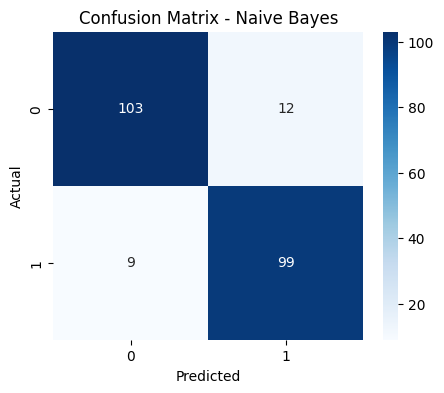

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Akurasi
train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print(f"Akurasi Train: {train_acc:.4f}")
print(f"Akurasi Test : {test_acc:.4f}\n")

# Laporan klasifikasi
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

## SVM

Akurasi Train: 0.9989
Akurasi Test : 0.9417

Classification Report (Test Set - SVM):
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       115
           1       0.94      0.94      0.94       108

    accuracy                           0.94       223
   macro avg       0.94      0.94      0.94       223
weighted avg       0.94      0.94      0.94       223



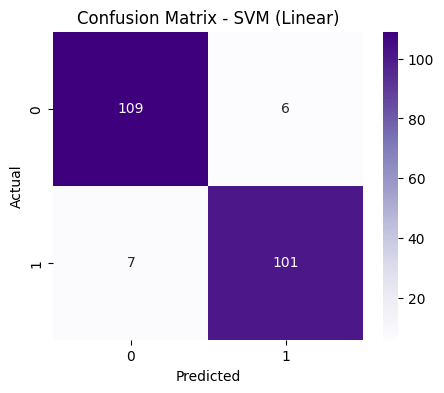

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Akurasi
train_acc_svm = accuracy_score(y_train, y_train_pred_svm)
test_acc_svm  = accuracy_score(y_test, y_test_pred_svm)

print(f"Akurasi Train: {train_acc_svm:.4f}")
print(f"Akurasi Test : {test_acc_svm:.4f}\n")

# Laporan klasifikasi
print("Classification Report (Test Set - SVM):")
print(classification_report(y_test, y_test_pred_svm))

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_test_pred_svm)
plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Purples", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM (Linear)")
plt.show()

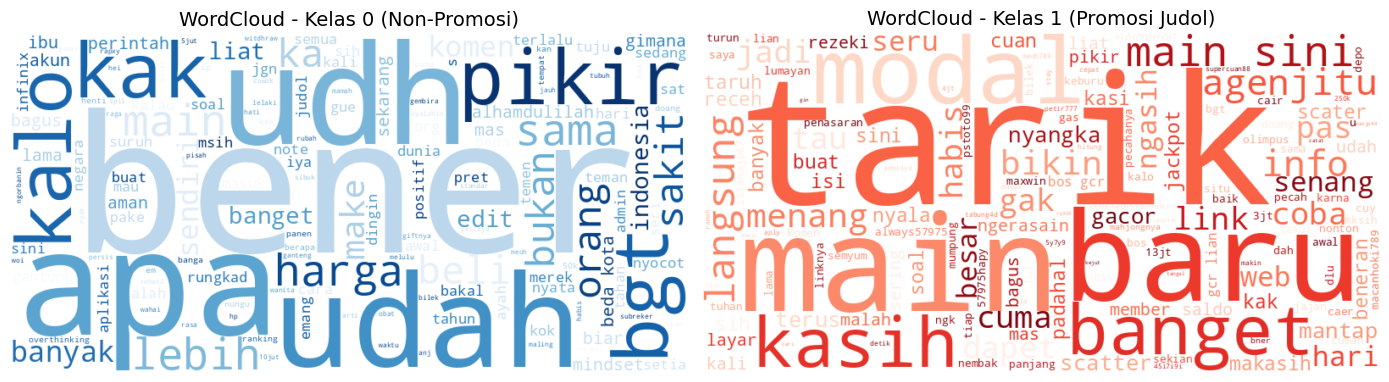

In [31]:
# WordCloud Berdasarkan Kelas (Dari Data Asli atau Prediksi SVM)
from wordcloud import WordCloud
import matplotlib.pyplot as plt


text_non_promosi = " ".join(X_test[y_test_pred_svm == 0])
text_promosi = " ".join(X_test[y_test_pred_svm == 1])

# --- WordCloud untuk kelas 0: Non-Promosi ---
wc_non_promosi = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Blues",
    max_words=150
).generate(text_non_promosi)

# --- WordCloud untuk kelas 1: Promosi Judol ---
wc_promosi = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Reds",
    max_words=150
).generate(text_promosi)

# --- Visualisasi ---
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.imshow(wc_non_promosi, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Kelas 0 (Non-Promosi)", fontsize=14)

plt.subplot(1,2,2)
plt.imshow(wc_promosi, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Kelas 1 (Promosi Judol)", fontsize=14)

plt.tight_layout()
plt.show()


## Random Forest

Akurasi Train: 1.0000
Akurasi Test : 0.9103

Classification Report (Test Set - Random Forest):
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       115
           1       0.92      0.90      0.91       108

    accuracy                           0.91       223
   macro avg       0.91      0.91      0.91       223
weighted avg       0.91      0.91      0.91       223



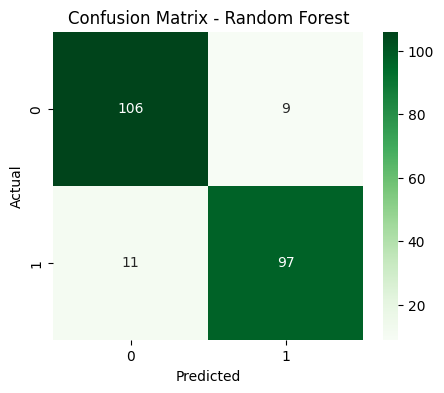

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Akurasi
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf  = accuracy_score(y_test, y_test_pred_rf)

print(f"Akurasi Train: {train_acc_rf:.4f}")
print(f"Akurasi Test : {test_acc_rf:.4f}\n")

# Laporan klasifikasi
print("Classification Report (Test Set - Random Forest):")
print(classification_report(y_test, y_test_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

## Logistic Regression

Akurasi Train: 0.9708
Akurasi Test : 0.9103

Classification Report (Test Set - Logistic Regression):
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       115
           1       0.92      0.89      0.91       108

    accuracy                           0.91       223
   macro avg       0.91      0.91      0.91       223
weighted avg       0.91      0.91      0.91       223



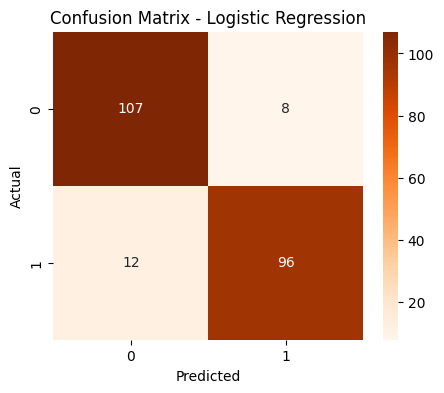

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Akurasi
train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
test_acc_lr  = accuracy_score(y_test, y_test_pred_lr)

print(f"Akurasi Train: {train_acc_lr:.4f}")
print(f"Akurasi Test : {test_acc_lr:.4f}\n")

# Laporan klasifikasi
print("Classification Report (Test Set - Logistic Regression):")
print(classification_report(y_test, y_test_pred_lr))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_test_pred_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Oranges", xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()